# Hyperparamter tuning

In [19]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [21]:
df = pd.read_csv("data/BTCUSDT-hour-target-features.csv")
# df = pd.read_csv("data/modelv1_training_data.csv")

# dfd = pd.read_csv("data/classification_test.csv")

# grid = {"n_estimators": [100],
#         "max_depth": [None, 5, 10, 20, 30, 50, 100],
#         "max_features": ["auto", "sqrt"],
#         "min_samples_split":[2, 4, 6, 10],
#         "min_samples_leaf":[1, 2, 4, 8]}

In [145]:
grid = {"n_estimators": [10, 30, 60, 100, 150, 200],
        "max_depth": [None, 3, 5, 10, 20, 30, 50, 70, 100, 150, 200, 500],
        "min_samples_split":[2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 50, 100, 200, 500, 1000],
        "min_samples_leaf":[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 50, 100, 200, 500, 1000],
        "min_weight_fraction_leaf":[0., 0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5], #[0, 0.5]
        "max_features":["auto", "sqrt", "log2"],
        "max_leaf_nodes":[None, 2, 5, 10, 20, 30, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 100000, 1000000],
        "min_impurity_decrease":[0., 0.1, 0.2, 0.5, 0.8, 1., 1.5, 2., 3., 5., 10., 15., 20., 50., 100., 200.],
        "bootstrap": [True, False],
       } 

In [123]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df.copy()
d.dropna(inplace=True)
close = d["close"][29000:]

d = d[list(indicators)].copy().astype(np.float32)

X = d.drop(["target", "close"], axis=1, errors="ignore")[:29000]
y = d["target"][:29000]

X_ft = d.drop(["target", "close"], axis=1, errors="ignore")[29000:]
y_ft = d["target"][29000:]

In [124]:
# X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size=0.2)
# X_train2, X_test, y_train2, y_test = train_test_split(X, y, test_size=0.2)
# X_train3, X_test, y_train3, y_test = train_test_split(X, y, test_size=0.2)
# X_train4, X_test, y_train4, y_test = train_test_split(X, y, test_size=0.2)
# X_train5, X_test, y_train5, y_test = train_test_split(X, y, test_size=0.2)

In [125]:
# model = RandomForestClassifier(n_estimators=[10, 30, 60, 100, 150, 200], n_jobs=-1)

In [149]:
X.shape[0]

29000

In [146]:
d = {}
for val in grid["bootstrap"]:
    results = []
    model = RandomForestClassifier(n_estimators=10,
                                   max_depth=None,
                                   min_samples_split=9,
                                   min_samples_leaf=2,
                                   min_weight_fraction_leaf=0.,
                                   max_features="auto",
                                   max_leaf_nodes=500,
                                   min_impurity_decrease=0.,
                                   bootstrap=True,
                                   n_jobs=-1)
    model.fit(X_train1, y_train1)
    results.append(f1_score(y_ft, model.predict(X_ft)))
    model.fit(X_train2, y_train2)
    results.append(f1_score(y_ft, model.predict(X_ft)))
    model.fit(X_train3, y_train3)
    results.append(f1_score(y_ft, model.predict(X_ft)))
    model.fit(X_train4, y_train4)
    results.append(f1_score(y_ft, model.predict(X_ft)))
    model.fit(X_train5, y_train5)
    results.append(f1_score(y_ft, model.predict(X_ft)))
    
    d["precision_" + str(val)] = np.mean(results)
#     d["precision_" + str(val)] = np.sum(model.predict(X_ft))

d

{'precision_True': 0.3238209296316733, 'precision_False': 0.25269867344609426}

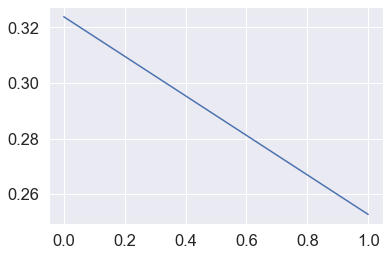

In [147]:
plt.plot(d.values())

Text(-1.5, 0.5, 'Predicted label')

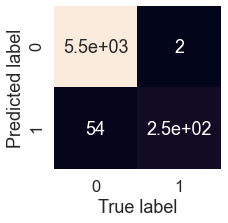

In [150]:
model = RandomForestClassifier(n_estimators=10,
                                   max_depth=None,
                                   min_samples_split=9,
                                   min_samples_leaf=2,
                                   min_weight_fraction_leaf=0.,
                                   max_features="auto",
                                   max_leaf_nodes=500,
                                   min_impurity_decrease=0.,
                                   bootstrap=True,
                                   
                                   n_jobs=-1)
model.fit(X_train1, y_train1)
y_preds = model.predict(X_test)

sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True,
                 cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")

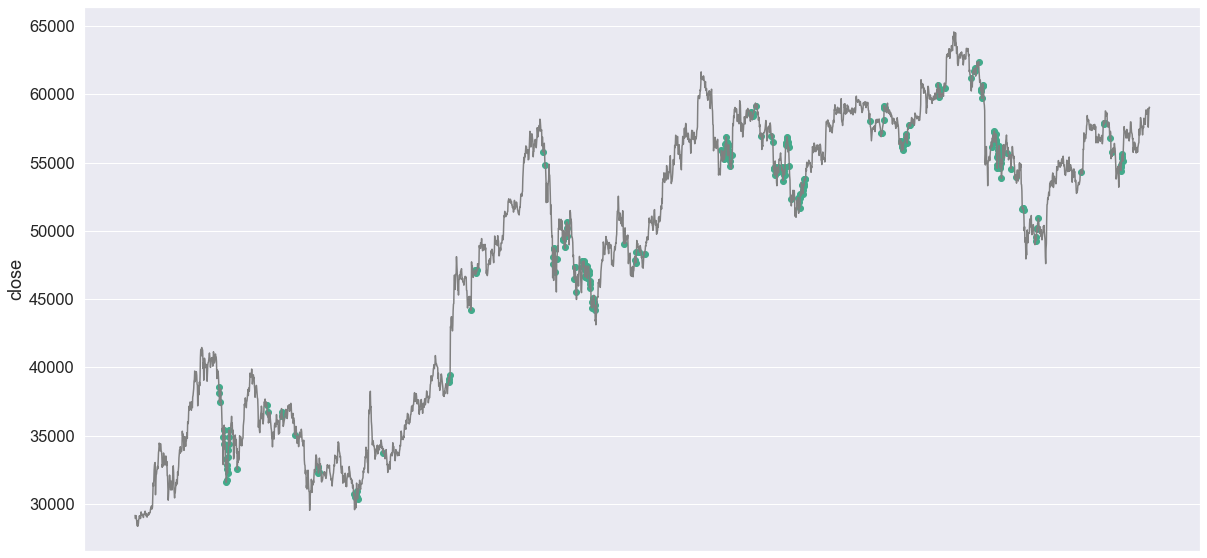

In [151]:
results = model.predict(X_ft)
scatter_results = list(map(lambda x, c: c if x == 1 else None, results, close))

s_correct = list(map(lambda x, t, c: c if x == 1 and t == 1 else None, results, y_ft, close))
s_wrong = list(map(lambda x, t, c: c if x == 1 and t == 0 else None, results, y_ft, close))
s_missed = list(map(lambda x, t, c: c if x == 0 and t == 1 else None, results, y_ft, close))

fig,ax = plt.subplots(figsize=(20, 10))

rows = len(close)
ax.scatter(range(rows), 
            scatter_results,
            color="#43aa8b")


# ax.scatter(range(rows), 
#             s_missed,
#         color="#f9c74f")

# ax.scatter(range(rows), 
#             s_correct,
#         color="#43aa8b")

# ax.scatter(range(rows), 
#             s_wrong,
#         color="#f94144")

ax.set_xlabel("time")
ax.set_ylabel("close")
ax.plot(range(rows),
        close,
        color="gray")

ax.tick_params(labelbottom=False)
ax.axes.xaxis.set_visible(False)

In [9]:
rs_clf = RandomizedSearchCV(estimator=model,
                            param_distributions=grid,
                            n_iter=10,
                            scoring="precision",
                            cv=5,
                            verbose=2)

In [10]:
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  31.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  30.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  29.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  30.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=500; total time=  30.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   7.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   7.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=4, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30, 50],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 2000]},
                   scoring='precision', verbose=2)

In [11]:
rs_clf.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30}

In [12]:
rs_y_preds = rs_clf.predict(X_test) # Make predictions with best hyperparamaters

In [13]:
rs_metrics = evaluate_preds(y_test, rs_y_preds)

NameError: name 'evaluate_preds' is not defined

## Previous metrics

Text(-1.5, 0.5, 'Predicted label')

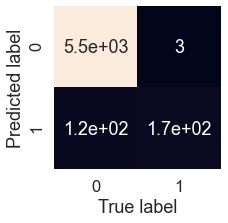

In [14]:
y_preds = rs_clf.predict(X_test)

sns.set(font_scale = 1.5)
fig, ax = plt.subplots(figsize=(3, 3))
ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                 annot=True,
                 cbar=False)
plt.xlabel("True label")
plt.ylabel("Predicted label")

In [152]:
d = {}
# model = RandomForestClassifier(n_estimators=1000,
#  min_samples_split= 2,
#  min_samples_leaf=2,
#  max_features='auto',
#  max_depth= 30)
d["precision"] = np.mean(cross_val_score(model, X, y, cv=5, scoring='precision'))
d

{'precision': 0.21504976251625885}

In [17]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, n_estimators=1000)

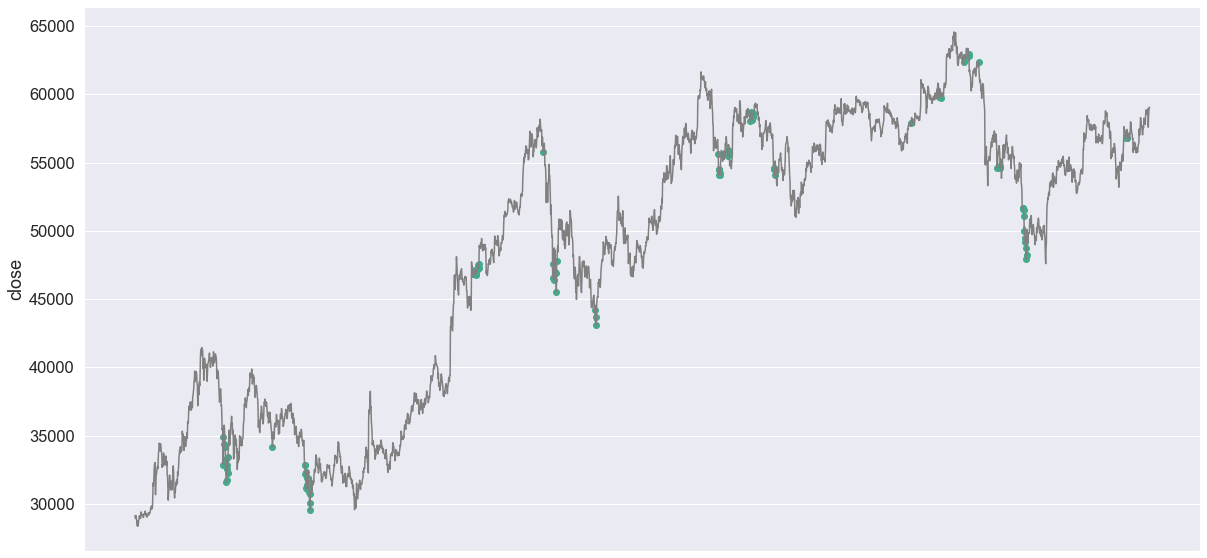

In [18]:
results = model.predict(X_ft)
scatter_results = list(map(lambda x, c: c if x == 1 else None, results, close))

s_correct = list(map(lambda x, t, c: c if x == 1 and t == 1 else None, results, y_ft, close))
s_wrong = list(map(lambda x, t, c: c if x == 1 and t == 0 else None, results, y_ft, close))
s_missed = list(map(lambda x, t, c: c if x == 0 and t == 1 else None, results, y_ft, close))

fig,ax = plt.subplots(figsize=(20, 10))

rows = len(close)
ax.scatter(range(rows), 
            scatter_results,
            color="#43aa8b")


# ax.scatter(range(rows), 
#             s_missed,
#         color="#f9c74f")

# ax.scatter(range(rows), 
#             s_correct,
#         color="#43aa8b")

# ax.scatter(range(rows), 
#             s_wrong,
#         color="#f94144")

ax.set_xlabel("time")
ax.set_ylabel("close")
ax.plot(range(rows),
        close,
        color="gray")

ax.tick_params(labelbottom=False)
ax.axes.xaxis.set_visible(False)